In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                  header=0, parse_dates=True, na_values=-99.99, index_col=0)

df.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [3]:
columns = ["Lo 20", "Hi 20"]

returns = df[columns]
returns.head()

,Lo 20,Hi 20
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16


In [4]:
returns = returns/100

<AxesSubplot:>

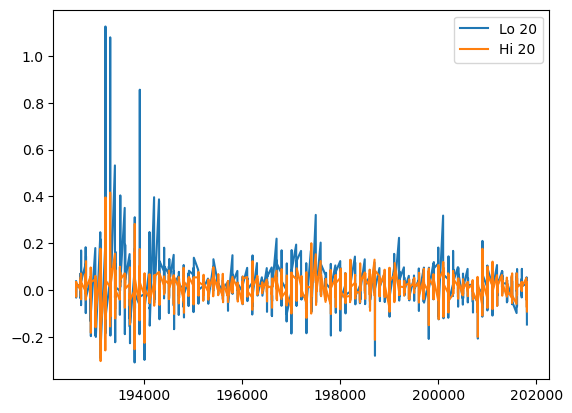

In [5]:
returns.plot()

In [6]:
returns.columns = ["SmallCap", "LargeCap"]

<AxesSubplot:>

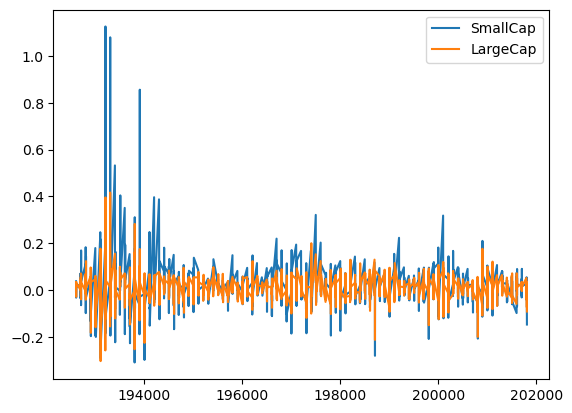

In [7]:
returns.plot()

In [8]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.336701
LargeCap    0.195116
dtype: float64

We can clearly see that the LargeCap is relatively less volatile compared to the SmallCap. Interesting.

In [10]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.011860
LargeCap    0.007859
dtype: float64

In [12]:
annualized_return = (return_per_month+1)**12 - 1
annualized_return

SmallCap    0.151977
LargeCap    0.098490
dtype: float64

In [13]:
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

SmallCap    0.151977
LargeCap    0.098490
dtype: float64

In [14]:
risk_free_rate = 0.04
excess_return = annualized_return - risk_free_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.332571
LargeCap    0.299771
dtype: float64

SmallCap is clearly the winner here with a higher sharpe ration.